In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.image as mpimg

In [14]:
cc = pd.read_csv('CC_Bottle_Cast.csv')
chlor = cc['ChlorA']
#cc=cc[['Cruise_ID', 'Temp', 'Silicate', 'Phosphate', 'Nitrogen', 'Month', 'Year', 'Lat_Dec', 'Lon_Dec', 'ChlorA']]
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221588 entries, 0 to 221587
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Cast_Count     221588 non-null  int64  
 1   Depth          221588 non-null  int64  
 2   Temp           221588 non-null  float64
 3   Silicate       221588 non-null  float64
 4   Phosphate      221588 non-null  float64
 5   ChlorA         221588 non-null  float64
 6   Light_Percent  16752 non-null   float64
 7   Cruise_ID      221588 non-null  object 
 8   Station_ID     221588 non-null  object 
 9   Date           221588 non-null  object 
 10  Lat_Dec        221588 non-null  float64
 11  Lon_Dec        221588 non-null  float64
 12  Year           221588 non-null  int64  
 13  Month          221588 non-null  int64  
 14  Day            221588 non-null  int64  
 15  Nitrogen       221588 non-null  float64
dtypes: float64(8), int64(5), object(3)
memory usage: 27.0+ MB


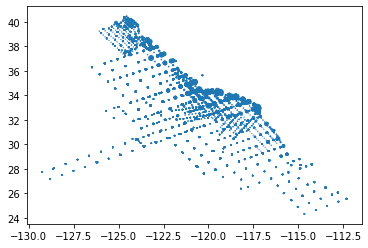

In [10]:
plt.scatter(cc['Lon_Dec'], cc['Lat_Dec'], s=cc['ChlorA'])

In [11]:
data2014 = cc[cc['Year']==2014]
data2015 = cc[cc['Year']==2015]
data2016 = cc[cc['Year']==2016]
data2017 = cc[cc['Year']==2017]
data2018 = cc[cc['Year']==2018]
data2019 = cc[cc['Year']==2019]
#data2020 = prediction_data

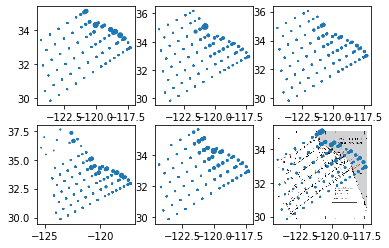

In [47]:
fig, ax = plt.subplots(2, 3)
img = plt.imread("CruiseMaps/2019CruiseMapjpg.jpg")
ax[1,2].imshow(img, aspect='auto', extent=[(data2019['Lon_Dec'].min()), (data2019['Lon_Dec'].max()), 
                            (data2019['Lat_Dec'].min()), (data2019['Lat_Dec'].max())]
              )
ax[0,0].scatter(data2014['Lon_Dec'], data2014['Lat_Dec'], s=data2014['ChlorA'])
ax[0,1].scatter(data2015['Lon_Dec'], data2015['Lat_Dec'], s=data2015['ChlorA'])
ax[0,2].scatter(data2016['Lon_Dec'], data2016['Lat_Dec'], s=data2016['ChlorA'])
ax[1,0].scatter(data2017['Lon_Dec'], data2017['Lat_Dec'], s=data2017['ChlorA'])
ax[1,1].scatter(data2018['Lon_Dec'], data2018['Lat_Dec'], s=data2018['ChlorA'])
ax[1,2].scatter(data2019['Lon_Dec'], data2019['Lat_Dec'], s=data2019['ChlorA'])